In [11]:
# PyData London 2018 proposal demo
# Mr Bean visits CNNs: A visual story
# Amaryta Ranjan Saikia (ar5saikia [at] gmail [dot] com)

# 3 Layer CNN

import os,cv2  #image path & image processing
import numpy as np #arrays
import matplotlib.pyplot as plt #plotting

In [2]:
from sklearn.utils import shuffle #shuffle the dataset
from sklearn.cross_validation import train_test_split #train-validate-test

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from keras import backend as K #to build the CNN layers
K.set_image_dim_ordering('tf') #Tensorflow backend

from keras import callbacks
from keras.utils import np_utils #converts class vector to binary matrix
from keras.models import Sequential #Sequential stacking of layers
from keras.layers.core import Dense, Dropout, Activation, Flatten #layers
from keras.layers.convolutional import Conv2D, MaxPooling2D #CNN Layers
from keras.optimizers import SGD,RMSprop,adam #optimizers to be used

Using TensorFlow backend.


In [4]:
#import images
PATH = os.getcwd()
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)

In [5]:
#specify image properties
img_rows = 128
img_cols = 128
num_channel = 1
num_epoch = 10

num_classes = 2

img_data_list = []

In [6]:
#load the image data-set
for dataset in data_dir_list:
	img_list = os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img = cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize = cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32') #cast to a specified type.
img_data /= 255 #normalize
print(img_data.shape)

Loaded the images of dataset-1_Bean

Loaded the images of dataset-2_Lion

(140, 128, 128)


In [7]:
# image ordering for differnet backend and channel
if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1)
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4)
		print (img_data.shape)

else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

(140, 128, 128, 1)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys


In [8]:
#labelling and formatting the dataset
num_classes = 2

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

#will add more data later : 70:70 for demo
labels[0:69] = 0 
labels[70:] = 1

In [9]:
names = ['Mr. Bean','Lion'] #label names

Y = np_utils.to_categorical(labels, num_classes) #on-hot encoding vector

x,y = shuffle(img_data,Y, random_state=2) #shuffle the datset

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2) #80-20 train test train_test_split

In [10]:
#build 3 layer CNN
input_shape = img_data[0].shape #128 x 128
model = Sequential()
stride_size = (3,3)

model.add(Conv2D(32, stride_size,padding='same',input_shape=input_shape))
model.add(Activation('relu'))

model.add(Conv2D(32, stride_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, stride_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [11]:
#model config

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        18496     
__________

In [12]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 128, 128, 1),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_last',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_1',
   'padding': 'same',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu', 'name': 'activation_1', 'trainable': True}},
 {'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 

In [13]:
#training the model with callbacks
filename = 'model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')
filepath = "Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,early_stopping,checkpoint]

hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

C:\Users\User\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 112 samples, validate on 28 samples
Epoch 1/10
112/112 [==============================] - 4s 35ms/step - loss: 4.9991 - acc: 0.5625 - val_loss: 0.6838 - val_acc: 0.5714
Epoch 2/10
112/112 [==============================] - 1s 5ms/step - loss: 0.7351 - acc: 0.4732 - val_loss: 0.6916 - val_acc: 0.6071


In [14]:
#result & evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

Test Loss: 0.691552579403
Test accuracy: 0.607142865658
(1, 128, 128, 1)
[[ 0.50307447  0.49692553]]
[0]
[[ 0.  1.]]


In [15]:
#Not that great accuracy, but hey!, its a simple CNN with less data

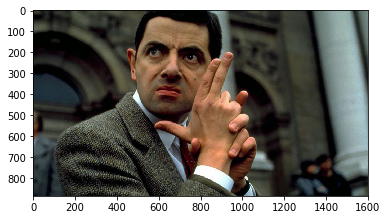

In [16]:
# Now lets try to load an image and check for classifcation
# This image is new and isn't available in train-test dataset
im1 = cv2.imread("bean_a.jpg")
im1 = cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
plt.imshow(im1)
plt.show()

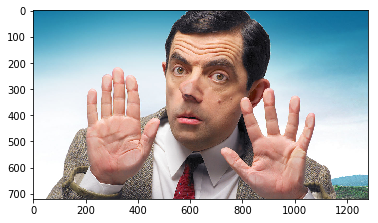

In [17]:
# Lets read another image
im1 = cv2.imread("bean_b.jpg")
im1 = cv2.cvtColor(im1,cv2.COLOR_BGR2RGB)
plt.imshow(im1)
plt.show()

In [18]:
# Now we test our first image. Its mr. Bean, so label assigned must be 0 for correct answer 
test_image = cv2.imread('bean_a.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)

print((model.predict(test_image)))
print(model.predict_classes(test_image))

(128, 128)
(1, 128, 128, 1)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  app.launch_new_instance()


[[ 0.50005716  0.49994284]]
[0]


In [19]:
# Correct but not that great performance on probabilities

In [20]:
# Let's check for the second one
test_image = cv2.imread('bean_b.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image = cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)

print((model.predict(test_image)))
print(model.predict_classes(test_image))

(128, 128)
(1, 128, 128, 1)


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  app.launch_new_instance()


[[ 0.50146401  0.49853605]]
[0]


In [21]:
# We will try to visualize the layers 
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

In [22]:
#We can change these parameters to get different results
layer_num=3
filter_num=0

In [23]:
activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]
print (np.shape(feature_maps))


(1, 1, 126, 126, 32)
(126, 126, 32)


In [24]:
#We visualize the Layer 3, filter 0/31 i.e 1/32
if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

(126, 126, 32)


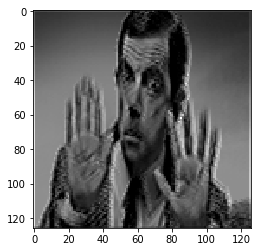

In [25]:
plt.show()

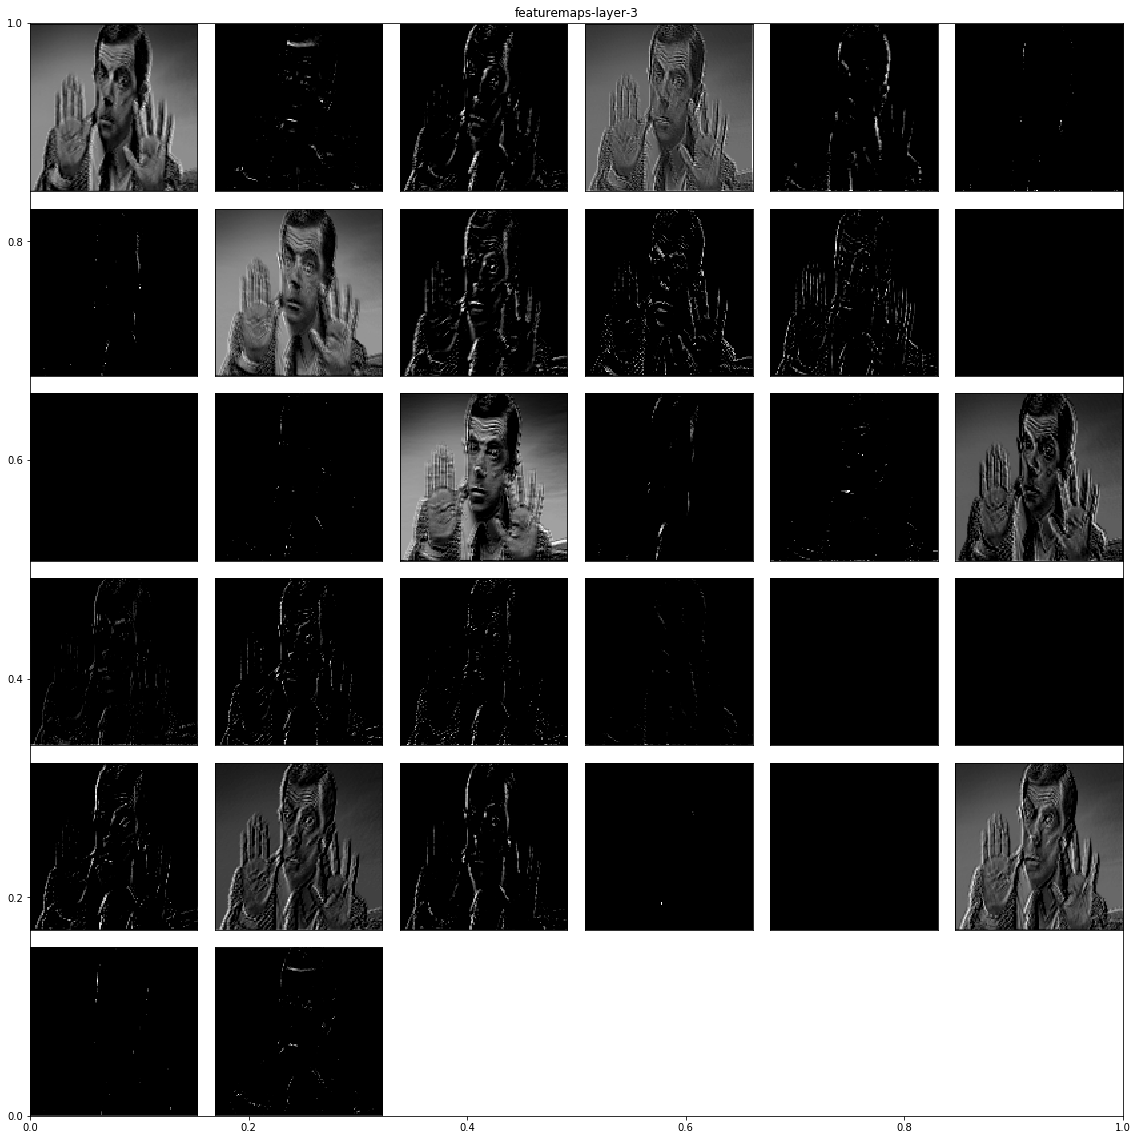

In [26]:
#For all the 32 filters of layer 3
num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

In [29]:
#similarly we can visualize other layers